In [ ]:
pip install python-louvain


Modularity: 0.2813953301874957


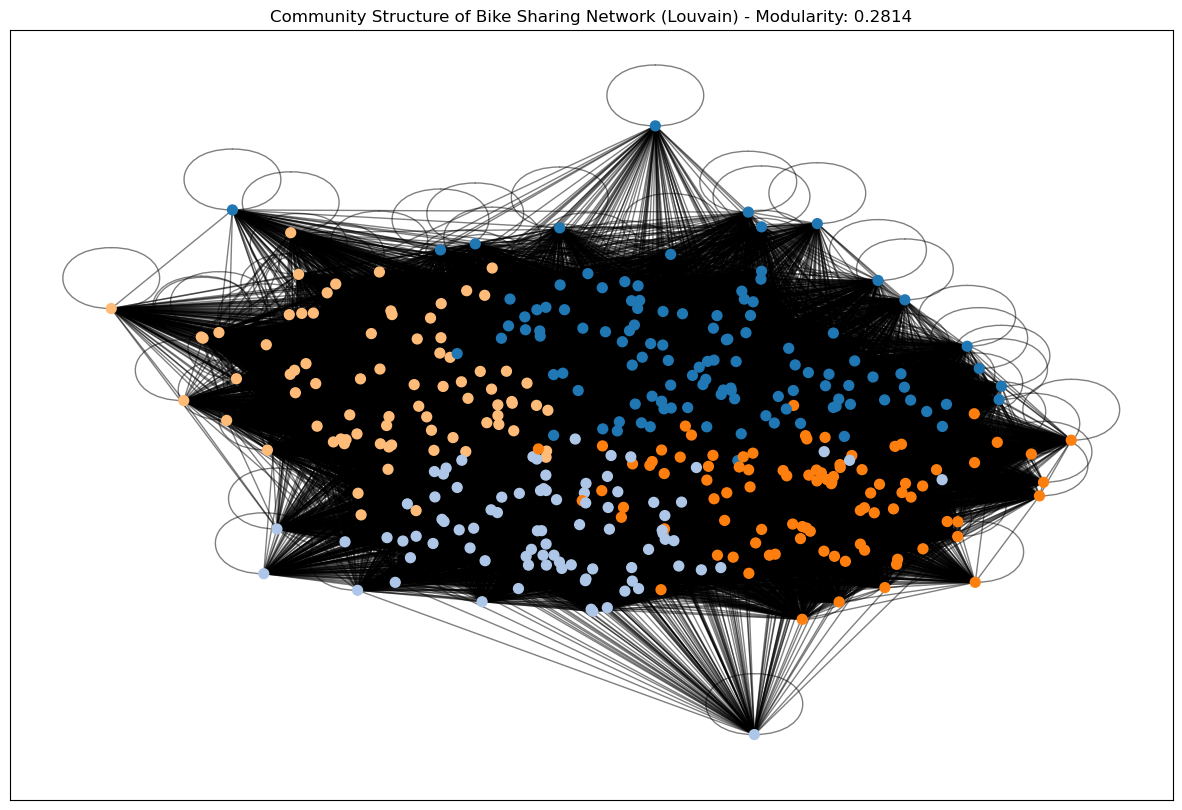

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load the data
file_path = 'complete_data_final.csv'
trip_data = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if G.has_edge(start_station, end_station):
        G[start_station][end_station]['weight'] += 1
    else:
        G.add_edge(start_station, end_station, weight=1)

# Apply Louvain community detection with a different resolution parameter
resolution = 1.02  # You can try different values to see the effect
partition = community_louvain.best_partition(G, weight='weight', resolution=resolution, randomize=False)

# Calculate the modularity score
modularity = community_louvain.modularity(partition, G)
print(f'Modularity: {modularity}')

# Create a color map for the communities
color_map = {}
colors = plt.cm.tab20.colors  # Get a set of colors
for idx, community in enumerate(set(partition.values())):
    color_map[community] = colors[idx % len(colors)]

# Assign colors to nodes based on their community
node_colors = [color_map[partition[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title(f'Community Structure of Bike Sharing Network (Louvain) - Modularity: {modularity:.4f}')
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import folium
from community import community_louvain

# Load the data
file_path = 'complete_data_final.csv'
trip_data = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if G.has_edge(start_station, end_station):
        G[start_station][end_station]['weight'] += 1
    else:
        G.add_edge(start_station, end_station, weight=1)

# Apply Louvain community detection with a different resolution parameter
resolution = 1.02  # You can try different values to see the effect
partition = community_louvain.best_partition(G, weight='weight', resolution=resolution, randomize = False)

# Define custom colors for specific communities
custom_colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple'
}

# Create a folium map centered around Central London
m = folium.Map(location=[51.5074, -0.1278], zoom_start=13)

# Add stations to the folium map
for node in G.nodes():
    station_data = trip_data[trip_data['Start station number'] == node].iloc[0]
    lat = station_data['lat_start']
    lon = station_data['lon_start']
    community = partition[node]
    color = custom_colors.get(community, 'black')  # Default to black if community is not in custom_colors
    folium.CircleMarker(
        location=(lat, lon),
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f'Station: {node}\nCommunity: {community}'
    ).add_to(m)

# Save the folium map as an HTML file
m.save('london_bike_sharing_communities(Louvain).html')

# Display the map
m


Adding communities (start/end) to station dataset


In [ ]:
import pandas as pd

# Load the datasets
complete_data = pd.read_csv('complete_data_final.csv')
station_data = pd.read_csv('Station_data_with_community.csv')

# Merge the community information with the trip data for the starting station
complete_data = complete_data.merge(station_data[['commonName', 'Community']], left_on='Start station', right_on='commonName', how='left')
complete_data = complete_data.rename(columns={'Community': 'Community_start'})

# Merge the community information with the trip data for the ending station
complete_data = complete_data.merge(station_data[['commonName', 'Community']], left_on='End station', right_on='commonName', how='left')
complete_data = complete_data.rename(columns={'Community': 'Community_end'})

# Dropping the commonName columns from the merge (not needed in final output)
complete_data = complete_data.drop(columns=['commonName_x', 'commonName_y'])

# Save the result to a new CSV file
complete_data.to_csv('complete_data_with_communities.csv', index=False)
